# Dataset de Notas dos Alunos de Ciência da computação na UFPI

## Introdução

A criação de um dataset com informações sobre as notas dos alunos de Ciência da Computação é uma iniciativa para a análise e melhoria do processo educacional. Esse tipo de dataset permite identificar padrões de desempenho acadêmico, como as disciplinas que apresentam maior dificuldade para os alunos, além de possibilitar a análise de fatores que influenciam o aprendizado.

Com esses dados, é possível desenvolver estratégias para melhorar o ensino, como a criação de materiais didáticos mais direcionados ou o reforço em áreas específicas. Além disso, o dataset pode ser utilizado em projetos aprendizado de máquina para ele se tornar uma ferramenta valiosa tanto para professores quanto para estudantes e pesquisadores.

## 1. Volume do Dataset

O dataset reúne informações detalhadas sobre as notas, situação e faltas de diversos alunos em múltiplas disciplinas (73). Ele apresenta uma quantidade suficiente de registros (os alunos registrados tem média de mais 40 disciplinas, passando dados mais completos) para permitir análises significativas, como a identificação de padrões de desempenho, disciplinas mais desafiadoras e fatores que influenciam o aprendizado.

## 2. Procedimento de Coleta

A coleta de dados foi realizada de maneira ética e organizada, utilizando um formulário do Google Forms para reunir boletins acadêmicos dos alunos. Esses boletins foram gerados pelo sistema SIGAA (Sistema Integrado de Gestão de Atividades Acadêmicas), garantindo a autenticidade e a padronização das informações.

Os dados coletados nos boletins, como notas, faltas e situação dos alunos, foram extraídos diretamente dos arquivos PDF utilizando bibliotecas em Python, como o `pdfplumber`. Esse processo automatizado permitiu a extração precisa e eficiente das informações, assegurando a integridade dos dados e reduzindo a possibilidade de erros manuais.

A Criação em sí do dataset seguiu os seguintes passos:

1. **Extração de Dados**: Utilizamos a biblioteca `pdfplumber` para extrair tabelas de arquivos PDF contendo informações sobre as notas e faltas dos alunos.
2. **Validação e Transformação**: As linhas extraídas são validadas e transformadas em um formato estruturado para facilitar a manipulação.
3. **Criação do Dataset**: Os dados processados são organizados em um DataFrame do `pandas` e salvos em um arquivo CSV para análises futuras.



### Código
```markdown

A célula de código abaixo importa as bibliotecas necessárias para o processamento e análise de dados. As bibliotecas utilizadas são:

- `pdfplumber`: Para extração de tabelas de arquivos PDF.
- `pandas`: Para manipulação e análise de dados em formato tabular.
- `matplotlib.pyplot`: Para criação de gráficos e visualizações.
- `seaborn`: Para visualizações estatísticas mais avançadas.
- `os`: Para manipulação de arquivos e diretórios no sistema operacional.

Essas bibliotecas são essenciais para o fluxo de trabalho descrito no notebook, permitindo a extração, transformação e análise dos dados de forma eficiente.
```

# Funções de Processamento de Dados

As células de código abaixo contêm funções essenciais para o processamento dos dados extraídos dos arquivos PDF. Essas funções incluem:

- **`eh_linha_valida(linha)`**: Valida se uma linha extraída do PDF contém informações relevantes e está no formato esperado.
- **`extrair_dados_do_pdf(pdf_path, aluno_id)`**: Extrai os dados de um arquivo PDF específico, validando as linhas e associando um identificador único para cada aluno.
- **`extrair_notas_pasta(pasta_pdfs, csv_completo)`**: Processa todos os arquivos PDF em uma pasta, consolidando os dados em um único dataset no formato CSV.
- **`criar_dataframe(dados)`**: Converte os dados extraídos em um DataFrame do pandas, estruturando as colunas de acordo com o conteúdo.
- **`salvar_datasets(df, csv_completo)`**: Salva o DataFrame final em um arquivo CSV para análises futuras.

Essas funções são fundamentais para garantir que os dados sejam extraídos, validados e organizados de forma eficiente e consistente.

In [23]:
def eh_linha_valida(linha):
    if not linha or len(linha) < 8:
        return False
    
    if not linha[0] or not ('/' in linha[0] or linha[0].startswith(('DC', 'DMAT', 'DFIS'))):
        return False
    
    if not linha[1]:
        return False
    
    return any(i < len(linha) and linha[i] and any(c.isdigit() for c in linha[i]) for i in range(2, 5))


In [24]:
def extrair_dados_do_pdf(pdf_path, aluno_id):
    dados = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            tabelas = page.extract_tables()
            if tabelas:
                for tabela in tabelas:
                    for linha in tabela:
                        if eh_linha_valida(linha):
                            dados.append([aluno_id] + linha)
    return dados

In [25]:
def extrair_notas_pasta(pasta_pdfs, csv_completo):
    df_final = pd.DataFrame()
    arquivos_pdf = [f for f in os.listdir(pasta_pdfs) if f.endswith(".pdf")]
    
    for idx, arquivo in enumerate(sorted(arquivos_pdf), start=1):
        pdf_path = os.path.join(pasta_pdfs, arquivo)
        dados = extrair_dados_do_pdf(pdf_path, idx)
        df = criar_dataframe(dados)
        df_final = pd.concat([df_final, df], ignore_index=True)
    
    salvar_datasets(df_final, csv_completo)
    print(f"Dataset gerado com sucesso: {csv_completo}")

In [26]:
def criar_dataframe(dados):
    if not dados:
        return pd.DataFrame()
    
    max_cols = max(len(linha) for linha in dados)
    colunas = ["AlunoID", "Código", "Disciplina", "Unidade 1", "Unidade 2", "Unidade 3", "Unidade 4", "Unidade 5", "Prova Final", "Resultado", "Faltas", "Situação"]
    colunas = colunas[:max_cols] if max_cols <= len(colunas) else colunas + [f"Col{i}" for i in range(len(colunas)+1, max_cols+1)]
    
    return pd.DataFrame(dados, columns=colunas)

In [27]:
def salvar_datasets(df, csv_completo):
    df.to_csv(csv_completo, index=False)

In [28]:
if __name__ == "__main__":
    pasta_pdfs = "./NotasPDF"
    extrair_notas_pasta(pasta_pdfs, "Datasets/notas_alunos.csv")
    print("Processo concluído.")

Dataset gerado com sucesso: Datasets/notas_alunos.csv
Processo concluído.


In [35]:
import pandas as pd

caminho_csv = 'C:\\Users\\cclmp\\Documents\\GitHub\\DataScience-StudentGrades\\Datasets\\notas_alunos.csv'
df = pd.read_csv(caminho_csv)
df = df.iloc[:, :-2]
df.to_csv('notas_alunos_.csv', index=False)

# Exibição dos Resultados

O trecho de código abaixo é responsável por exibir os resultados da análise de dados. Ele inclui:

1. **Informações Gerais**:
    - Número total de alunos e disciplinas.
    - Média geral das notas e faltas.
    - Identificação do aluno com maior e menor média.

2. **Distribuição e Visualizações**:
    - Contagem da situação dos alunos (aprovados, reprovados, etc.).
    - Gráfico de barras mostrando a quantidade de disciplinas por aluno.
    - Gráfico de barras com a média geral por aluno.
    - Histograma para visualizar a distribuição das médias.
    - Gráfico de barras com a situação dos alunos.
    - Gráfico de barras com a média de faltas por aluno.

Essas visualizações e estatísticas ajudam a compreender melhor o desempenho dos alunos e identificar padrões ou problemas nos dados analisados.

Número total de alunos: 13
Número total de disciplinas: 57
Média geral das notas: 8.0
Média geral de faltas: 3.8
Aluno com maior média: 9
Aluno com menor média: 11

Situação dos alunos:
Situação
AM    458
EF     57
RN     25
RF      6
Name: count, dtype: int64


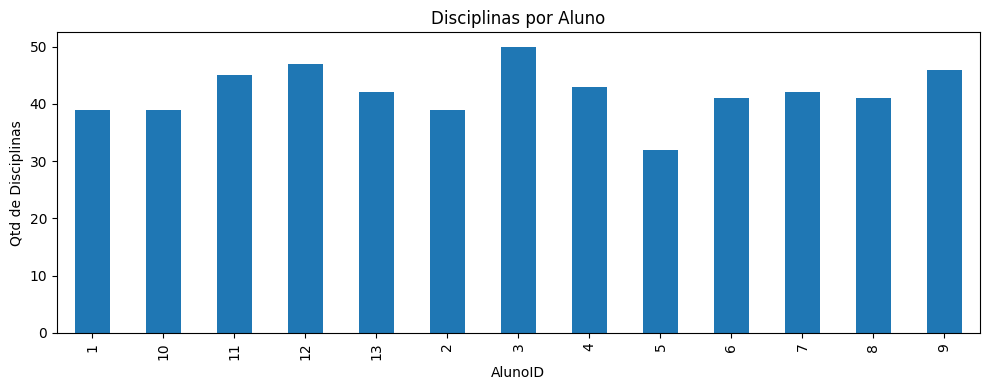

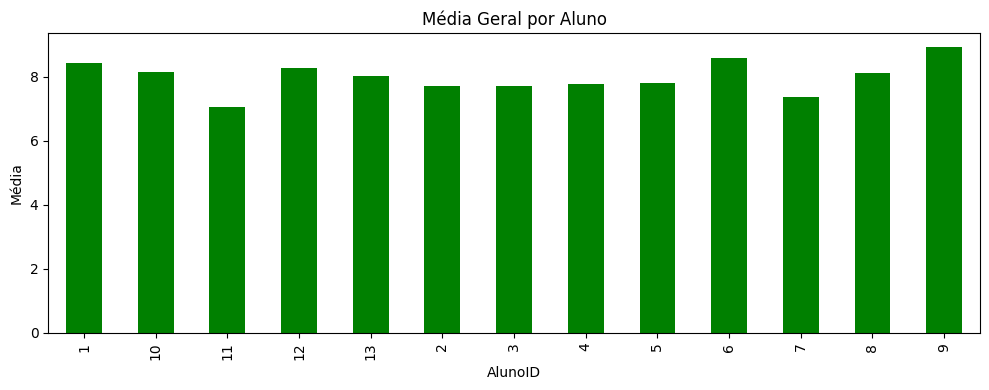

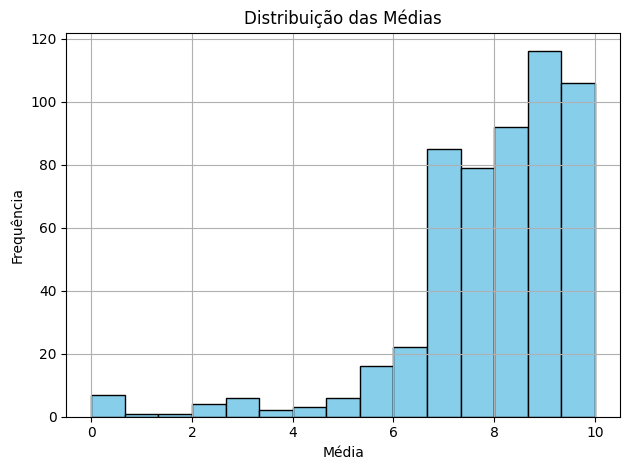

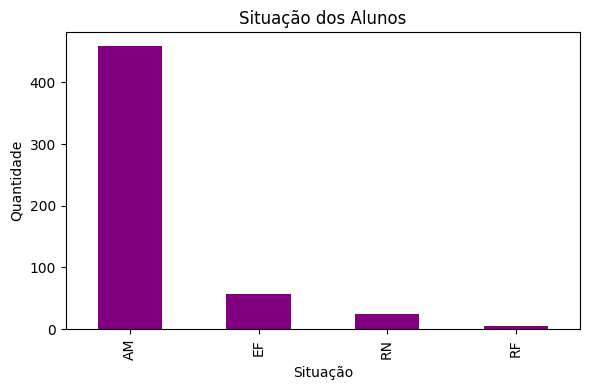

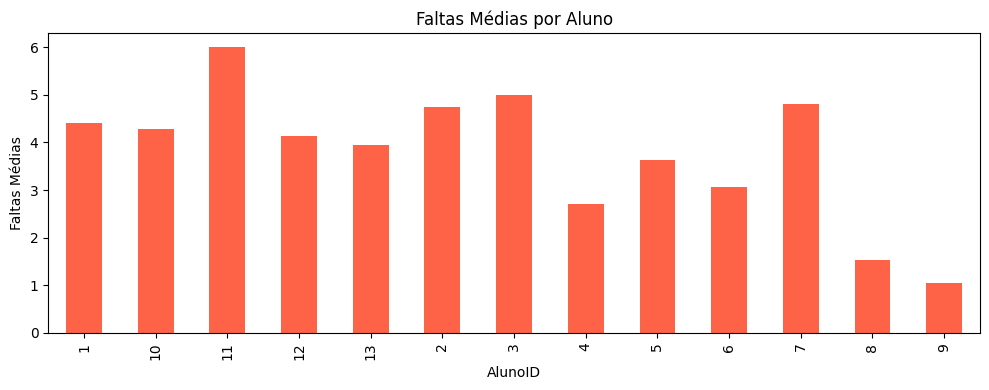

In [37]:
%matplotlib inline

def analisar_dados(caminho_csv="Datasets/notas_alunos.csv"):
    df = pd.read_csv(caminho_csv)
    df["AlunoID"] = df["AlunoID"].astype(str).str.strip().str.upper()


    colunas_notas = ["Unidade 1", "Unidade 2", "Unidade 3", "Unidade 4", "Unidade 5", "Prova Final", "Resultado"]
    for col in colunas_notas:
        if col in df.columns:
            df[col] = df[col].str.replace(",", ".").astype(float)

    df["Faltas"] = pd.to_numeric(df["Faltas"], errors="coerce")

    df["Média"] = df[colunas_notas].mean(axis=1, skipna=True)

    print("Número total de alunos:", df["AlunoID"].nunique())
    print("Número total de disciplinas:", df["Disciplina"].nunique())
    print("Média geral das notas:", round(df["Média"].mean(), 2))
    print("Média geral de faltas:", round(df["Faltas"].mean(), 2))
    
    aluno_melhor = df.groupby("AlunoID")["Média"].mean().idxmax()
    aluno_pior = df.groupby("AlunoID")["Média"].mean().idxmin()
    print(f"Aluno com maior média: {aluno_melhor}")
    print(f"Aluno com menor média: {aluno_pior}")

    print("\nSituação dos alunos:")
    print(df["Situação"].value_counts())

    # Disciplinas por aluno
    df["AlunoID"].value_counts().sort_index().plot(kind='bar', figsize=(10, 4), title="Disciplinas por Aluno")
    plt.xlabel("AlunoID")
    plt.ylabel("Qtd de Disciplinas")
    plt.tight_layout()
    plt.show()

    # Média geral por aluno
    df.groupby("AlunoID")["Média"].mean().plot(kind="bar", color="green", figsize=(10, 4), title="Média Geral por Aluno")
    plt.xlabel("AlunoID")
    plt.ylabel("Média")
    plt.tight_layout()
    plt.show()

    # Distribuição das médias
    df["Média"].hist(bins=15, color="skyblue", edgecolor="black")
    plt.title("Distribuição das Médias")
    plt.xlabel("Média")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

    # Situação dos alunos
    df["Situação"].value_counts().plot(kind='bar', color='purple', figsize=(6,4), title="Situação dos Alunos")
    plt.xlabel("Situação")
    plt.ylabel("Quantidade")
    plt.tight_layout()
    plt.show()

    # Média de faltas por aluno
    df.groupby("AlunoID")["Faltas"].mean().plot(kind="bar", color="tomato", figsize=(10, 4), title="Faltas Médias por Aluno")
    plt.xlabel("AlunoID")
    plt.ylabel("Faltas Médias")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analisar_dados("Datasets/notas_alunos.csv")


## 3. Conhecimento Esperado

O conhecimento esperado do dataset é proporcionar uma compreensão aprofundada do desempenho acadêmico dos alunos de Ciência da Computação na UFPI. Através da análise dos dados, espera-se identificar padrões de desempenho, como disciplinas que apresentam maior dificuldade e fatores que influenciam o aprendizado. Além disso, o dataset pode ser utilizado para desenvolver estratégias de ensino mais eficazes, como a criação de materiais didáticos direcionados e o reforço em áreas específicas.

In [36]:
def identificar_disciplinas_dificeis(caminho_csv="Datasets/notas_alunos.csv", top_n=5):
    # Carregar o dataset
    df = pd.read_csv(caminho_csv)
    
    # Converter colunas de notas para valores numéricos
    colunas_notas = ["Unidade 1", "Unidade 2", "Unidade 3", "Unidade 4", "Unidade 5", "Prova Final"]
    for col in colunas_notas:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].str.replace(",", "."), errors="coerce")
    
    # Calcular a média das notas por disciplina
    df["Média Disciplina"] = df[colunas_notas].mean(axis=1, skipna=True)
    medias_disciplinas = df.groupby("Disciplina")["Média Disciplina"].mean().sort_values()
    
    # Identificar as disciplinas com as menores médias
    disciplinas_dificeis = medias_disciplinas.head(top_n)
    
    print("Disciplinas mais difíceis (menores médias):")
    print(disciplinas_dificeis)

# Executar a função
if __name__ == "__main__":
    identificar_disciplinas_dificeis("Datasets/notas_alunos.csv", top_n=5)

Disciplinas mais difíceis (menores médias):
Disciplina
TÓPICOS EM ARQUITETURA DE COMPUTADORES        3.500000
ELETRICIDADE E MAGNETISMO                     4.166667
REDES NEURAIS ARTIFICIAIS                     6.000000
ARQUITETURA DE COMPUTADORES                   6.254688
TRABALHO DE CONCLUSÃO DE CURSO II - TCC II    6.277778
Name: Média Disciplina, dtype: float64


## 4. Organização e compartilhamento

O dataset será organizado em um repositório público, permitindo o acesso e a colaboração de outros pesquisadores e educadores. A documentação do dataset incluirá informações sobre a coleta, processamento e análise dos dados. O compartilhamento do dataset visa promover a transparência e a colaboração na comunidade acadêmica, contribuindo para o avanço do conhecimento na área de educação em Ciência da Computação.